# Name: Ritik Jangid
# Enrolement No.: 2018IMSCS017

In [1]:
# necessary imports
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/golf-dataset.csv')
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [3]:
df.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
Decision    object
dtype: object

In [4]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['Outlook']= label_encoder.fit_transform(df['Outlook'])
df['Temp']= label_encoder.fit_transform(df['Temp'])
df['Humidity']= label_encoder.fit_transform(df['Humidity'])
df['Decision']= label_encoder.fit_transform(df['Decision'])

In [5]:
df.head()

,Outlook,Temp,Humidity,Windy,Decision
0,1,1,0,False,0
1,1,1,0,True,0
2,0,1,0,False,1
3,2,2,0,False,1
4,2,0,1,False,1


In [6]:
X = df.drop(columns = ['Decision'])
y = df['Decision']

In [7]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## ID3

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.5


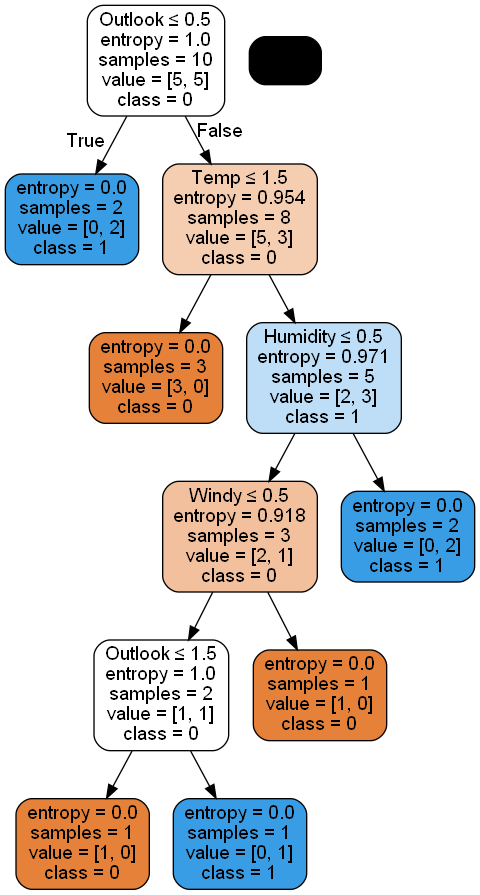

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Outlook','Temp','Humidity','Windy']

dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data.png')
Image(graph.create_png())

## CART

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.5


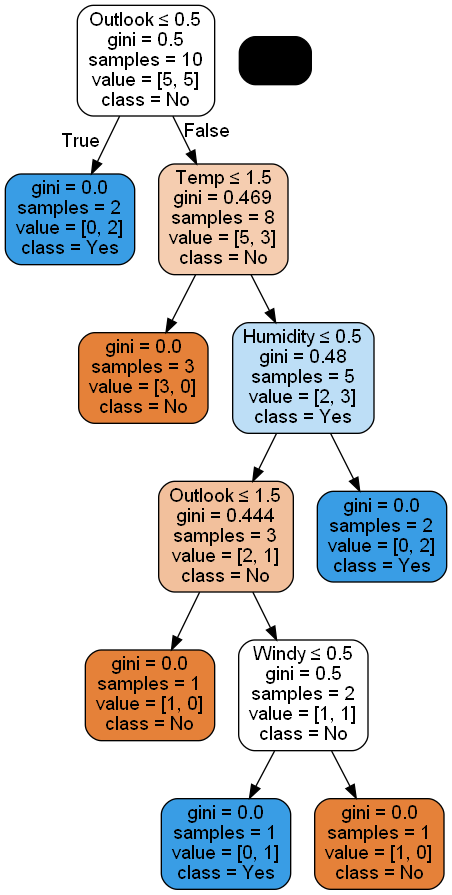

In [11]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Outlook','Temp','Humidity','Windy']

dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('data.png')
Image(graph.create_png())

## C 4.5

In [17]:
from chefboost import Chefboost as chef

In [18]:
config={'algorithm ':' (C4.5)'}

In [19]:
model = chef.fit(df,config)

[INFO]:  2 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  0.8205151557922363  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.16666666666666669
MSE:  0.08333333333333334
RMSE:  0.2886751345948129
RAE:  0.36004114991154784
RRSE:  0.6024640760767094
Mean:  0.6428571428571429
MAE / Mean:  25.925925925925927 %
RMSE / Mean:  44.90502093697089 %
